# Increasing accuracy in gated bimodal neural net classification with language transfer and visual attention

__Jen Seale,__ 
__CUNY Graduate Center,__
__Spring 2019__

### Abstract

This paper advances Kiela et al.'s (2018) research in bimodal neural net classification by testing the hypothesis that the gated fusion of a LSTM and a CNN, _with features that mimic human attributes_: transfer learning on the language model, and attention on the CNN, facilitates higher accuracy on classification tasks than recorded in Kiela et al. (2018) and Arevelo et al. (2017). << Insert results. >>

### I. Introduction
In seeking to model language, computationally, and theoretically, it is important that we do not lose sight of how language presents itself empirically: materially, natural language is energy generated by bioelectrical and biochemical neurological processes, and other physiological means (vocal or manual articulation). Its form reflects external, social stimuli, with the primary, underlying catalyst of change and variation being the survival of those who employ it. It has significant dependencies on cognition and referent, and its production and consumption are serial along an axis of time.  

At this moment, within the field of computational linguistics, we find ourselves at a place where some of the most powerful computational models of natural language generation and understanding are founded on a rudimentary representation of neurons and neural connection, namely, neural networks (Stanford University, n.d.). 

Recurrent neural net (RNN) variants, long-short term memory (LSTM) models, address the representation of the serial nature of language production and consumption (Young et al., 2018). 

Recent work in multimodal neural networks has brought us closer to modeling the inherent dependencies between language and referent—while we are able to view language as distinct from phenomena such as cognition and referent, we should treat the inherent _interfaces_ language has with its dependencies as a part of language itself. You don't really understand the eye without the morphology developed to process light, and language without its relationship to referent. You don't actually understand what a pointer is in C++, without understanding that it provides the location of another place in memory where data of interest is stored—likewise, you will not provide a good model of language without representing the mechanisms by which it points to cognitive realities. 

We also see, in the training of neural networks, an analog to the building of cognitive representation—and, in bimodal neural networks, that we achieve higher precision on classification tasks with the fusion of linguistic and visual data, reflecting the determination of many studies that call attention to the importance of visual perception to linguistic representation (Glenberg and Kaschak 2002; Barsalou 2008; Hill and Korhonen 2014; Lazaridou et al. 2015; Zablocki et al. 2017). 

This paper investigates the affect on performance that further represention of human linguistic and perceptual attributes has on classification tasks involving language and image data. The techniques under consideration are: the use of transfer learning for language processing (Howard and Ruder 2018; Smith 2017), and an attention convolutional neural net (CNN) (Ronneberger et al. 2015; Zheng et al. 2017). 

In transfer learning for natural language, a model is trained on the language first, and then fine-tuned to classify certain texts, somewhat mimicking the way humans learn and apply what they already know to novel tasks (Torrey and Shavlik 2009). An attention CNN mimics the human ability to focus in on particular aspects of what they are looking at—for instance, in talking with another person, an interlocutor will generally focus on the other’s face, backgrounding other visual material (Cao et al. 2015). 

[Summary of results here.]

### II. Classification task
The task set to our bimodal neural net is to predict human-applied genres for movies in a test subset of a multi-modal IMDB dataset released by Arevalo et al. (2017)—the MM-IMDB dataset. As the performance of bimodal neural net models developed by both Keila et al. (2018) and Arevelo (2017) against this dataset has been recorded, it works well as a testing ground for comparison. 

The dataset contains movie plot outlines, posters, and genre labels for 25,959 movies; movies can have multiple genre labels. Below the MM-IMDB movie data is explained in greater detail, and an example of a movie, with its genres, title, plot summary and poster image is given. 

### III. Data
The variable data_path, below, contains an absolute path where the MM-IMDB dataset for this project, made available by Arevelo et al. (2017) lives. It consists of a .json and .jpeg file for each of the 25,959 movies in the set. Both files are assigned the same title, a number which identifies them as pertaining to the same movie, with only their extensions differing. From the .json file, the 'genres' field provides the human-applied movie genres, and the 'title' and 'plot' field provide the text. The .jpeg file provides the movie poster image data which will be fused with the text data in training an prediction of the genres. 

In [1]:
import json

In [2]:
data_path = "/home/ubuntu/gmu_bimodal/data/mmimdb/dataset/" 

In [3]:
with open(data_path+"0399877.json") as json_data:
    data = json.load(json_data)
    print(data['genres'])
    print(data['title'])
    print(data['plot'])

['Documentary', 'Comedy', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi']
What the #$*! Do We (K)now!?
['"WHAT THE #$*! DO WE KNOW?!" is a radical departure from convention. It demands a freedom of view and greatness of thought so far unknown, indeed, not even dreamed of since Copernicus. It\'s a documentary. It\'s a story. It\'s mind-blowing special effects. This film plunges you into a world where quantum uncertainty is demonstrated - where neurological processes, and perceptual shifts are engaged and lived by its protagonist - where everything is alive, and reality is changed by every thought.', "Amanda, a divorced photographer, finds herself in a fantastic Alice-in-Wonderland experience when her daily, uninspired life literally begins to unravel, revealing the cellular, molecular and even quantum worlds which lie beneath. Guided by a Greek Chorus of leading scientists and mystics, she finds that if reality itself is not questionable, her notion of it certainly is. Stunning special effects

In [4]:
from IPython.display import Image

In [5]:
path = "/home/ubuntu/gmu_bimodal/data/mmimdb/" 

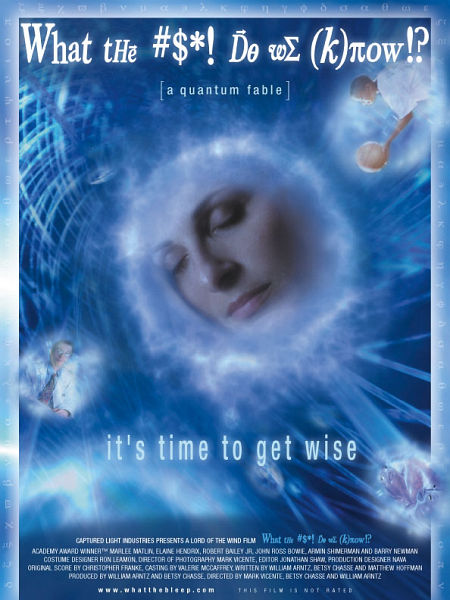

In [6]:
Image(path+"dataset/0399877.jpeg", width=300,height=500)

A 'texts.csv' file, with a row per movie, where indices representing the human-applied movie genres for each of the movies, and their corresponding title and plot text live, and was created using "/home/ubuntu/gmu_bimodal/data/mmimdb/make_data.py". This csv format is used by the fastai library to further prepare the data to finetune the wiki103 language model with the language used in the MM-IMDB movie reviews, and then to train the movie genre classifier.

### IV. Approach
A language classifier, trained incorporating language transfer via the ULMFiT method (Howard and Ruder. 2018), is fused with an attentional CNN using the Arevelo et al. (2017) gated multimodel unit technique. Neither language transfer nor an attentional CNN is used in Kiela et al. (2018).

#### Baseline comparison
As reported in Kiela et al. (2018), pg.4, Table 2., Arevalo et al. (2017) acheived an accuracy score of 63.0 on classification of the multi-label MM-IMDB dataset, while the accuracy of their continuous bilinear-gated model on the same came out to be 62.3, averged over five runs.

#### Language Model
Howard and Ruder's (2018) ULMfit method is used to fine-tune a pretrained language model,  WT103 (Merity et al. 2017; Merity et al. 2018), on the Arevalo et al. (2017) MM-IMDB dataset text, which is then used to create a custom classifier trained on the text and corresponding genres.

In [7]:
import torch
#Confirm use of GPU - 0 
torch.cuda.set_device(0)
torch.cuda.current_device()
#torch.cuda.device_count()
#torch.cuda.get_device_name(0)

0

In [8]:
import fastai
fastai.__version__

'1.0.40'

In [9]:
from fastai.text import * 

In [10]:
# Language model data
#https://docs.fast.ai/text.html
data_lm = TextLMDataBunch.from_csv(path, 'text_labels.csv', text_cols = 'text')
data_lm.save()
data_lm = TextLMDataBunch.load(path)

In [11]:
# Language model creation with WT103
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,4.261463,3.906825,0.316896


In [12]:
# Unfreeze final layer and fine-tune to MM-IMDB data (data_lm)
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy
1,3.876853,3.755987,0.333889


##### _An example of the language model's predictive capacity_

In [19]:
learn.predict("This movie really", n_words=15)

'This movie really might have been a feature - length movie , due to the gruesome details of'

In [20]:
learn.save_encoder('lm_encoder')

#### Language Classifier

In [15]:
from fastai.callbacks.tracker import EarlyStoppingCallback
from fastai.callbacks.tracker import SaveModelCallback
from fastai.callbacks.tracker import ReduceLROnPlateauCallback
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
texts_df = pd.read_csv(path+'text_labels.csv')

In [ ]:
train, valid = train_test_split(texts_df, test_size = 0.02, random_state = 0)

In [ ]:
valid.loc[: , 'is_valid'] = True

In [ ]:
# Classifier model data
data_multilabel = TextClasDataBunch.from_df(path, 
                                      train_df = train,
                                      valid_df = valid,
                                      text_cols = 'text', 
                                      label_cols ='labels',
                                      vocab=data_lm.train_ds.vocab, 
                                      bs=32)
data_multilabel.save()
data_multilabel = TextClasDataBunch.load(path, bs=32)

In [ ]:
#Classifier model creation
learn = text_classifier_learner(data_multilabel, drop_mult=0.5, metrics = [accuracy_thresh, fbeta])
print("learn classifier defined. model summary:")
print(learn.model)
learn.load_encoder('lm_encoder')

In [ ]:
learn.fit_one_cycle(1, 1e-2)

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

#### Genre prediction on example movie text

In [ ]:
learn.predict('WHAT THE #$*! DO WE KNOW?! "WHAT THE #$*! DO WE KNOW?!" is a radical departure from convention. It demands a freedom of view and greatness of thought so far unknown, indeed, not even dreamed of since Copernicus. It\'s a documentary. It\'s a story. It\'s mind-blowing special effects. This film plunges you into a world where quantum uncertainty is demonstrated - where neurological processes, and perceptual shifts are engaged and lived by its protagonist - where everything is alive, and reality is changed by every thought.', "Amanda, a divorced photographer, finds herself in a fantastic Alice-in-Wonderland experience when her daily, uninspired life literally begins to unravel, revealing the cellular, molecular and even quantum worlds which lie beneath. Guided by a Greek Chorus of leading scientists and mystics, she finds that if reality itself is not questionable, her notion of it certainly is. Stunning special effects plunge you into a world where quantum uncertainty is demonstrated - where Amanda's neurological processes, and perceptual shifts are engaged and lived - where everything is alive, and reality is changed by every thought. This film gives voice to the modern day radical souls of science, making them the true heroes of our day as they conquer and map the greatest uncharted territory yet - man's consciousness itself.", 'It is part documentary, part story, and part elaborate and inspiring visual effects and animations. The protagonist, Amanda, played by Marlee Matlin, finds herself in a fantastic Alice in Wonderland experience when her daily, uninspired life literally begins to unravel, revealing the uncertain world of the quantum field hidden behind what we consider to be our normal, waking reality.')

#### Image Classifier

In [ ]:
from fastai.vision import *

In [ ]:
data = ImageDataBunch.from_csv(path, folder="images_split", csv_labels="image_labels.csv", valid_pct=0.2)

In [ ]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [ ]:
learn.fit(1)

#### Fusion technique

### Conclusions

### References

Arevalo, John, Thamar Solorio, Manuel Montes-y Gomez, and Fabio A Gonzalez. 2017. Gated multimodal units for information fusion. arXiv preprint arXiv:1702.01992.

Barsalou, Lawrence W. 2008. Grounded cognition. Annu. Rev. Psychol. 59: 617–645.

Cao, Chunshui, Xianming Liu, Yi Yang, Yinan Yu, Jiang Wang, Zilei Wang, Yongzhen Huang, Liang Wang, Chang Huang, Wei Xu, et al.. 2015. Look and think twice: Capturing top-down visual attention with feedback convolutional neural networks. In Proceedings of the ieee international conference on computer vision, 2956–2964.

Glenberg, Arthur M, and Michael P Kaschak. 2002. Grounding language in action. Psychonomic Bulletin & Review 9 (3): 558–565.

Hill, Felix, and Anna Korhonen. 2014. Learning abstract concept embeddings from multi-modal data: Since you probably can’t see what I mean. In Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP), 255–265.

Howard, Jeremy, and Sebastian Ruder. 2018. Fine-tuned language models for text classification. arXiv preprint arXiv:1801.06146.

Kiela, Douwe, Edouard Grave, Armand Joulin, and Tomas Mikolov. 2018. Efficient large-scale multi-modal classification. arXiv preprint arXiv:1802.02892.

Lazaridou, Angeliki, Nghia The Pham, and Marco Baroni. 2015. Combining language and vision with a multimodal skip-gram model. arXiv preprint arXiv:1501.02598.

Merity, S., Xiong, C., Bradbury, J., and Socher, R. Pointer. 2017. Sentinel Mixture Models. International Conference on Learning Representations.

Merity, S., Keskar, N. S., & Socher, R. 2018. An Analysis of Neural Language Modeling at Multiple Scales. arXiv preprint arXiv:1803.08240.

Ronneberger, O., Fischer, P., & Brox, T. 2015. U-net: Convolutional networks for biomedical image segmentation. In International Conference on Medical image computing and computer-assisted intervention (pp. 234-241). Springer, Cham.

Smith, Leslie N. 2017. Cyclical learning rates for training neural networks. In Applications of computer vision (wacv), 2017 ieee winter conference on, 464–472. IEEE. IEEE.

Stanford University. n.d. Module 04: Neural Networks: Representation, Non-linear hypotheses. In Machine Learning [recorded lecture by Andrew Ng]. Retrieved from https://www.coursera.org/learn/machine-learning/home/week/4.

Torrey, Lisa, and Jude Shavlik. 2009. Transfer learning. Handbook of Research on Machine Learning Applications and Trends: Algorithms, Methods, and Techniques 1: 242.

Young, T., Hazarika, D., Poria, S., & Cambria, E. 2018. Recent trends in deep learning based natural language processing. ieee Computational intelligenCe magazine, 13(3), 55-75.

Zablocki, E ́loi, Benjamin Piwowarski, Laure Soulier, and Patrick Gallinari. 2017. Learning multi-modal word representation grounded in visual context. arXiv preprint arXiv:1711.03483.

Zheng, Heliang, Jianlong Fu, Tao Mei, and Jiebo Luo. 2017. Learning multi-attention convolutional neural network for fine-grained image recognition. In Int. conf. on computer vision.